In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [101]:
class ImageModel():

    """
    A class that represents the ImageModel
    """

    def __init__(self, imgPath: str):
        """
        :param imgPath: absolute path of the image
        """
        self.imgPath = imgPath
        self.img = cv2.imread(self.imgPath, flags=cv2.IMREAD_GRAYSCALE).T
        self.imgShape = self.img.shape
        self.fourier = np.fft.fft2(self.img)
        self.real = np.real(self.fourier)
        self.imaginary = np.imag(self.fourier)
        self.magnitude = np.abs(self.fourier)
        self.mag_spectrum = np.log10(self.magnitude)
        self.phase = np.angle(self.fourier)
        self.uniformMagnitude = np.ones(self.img.shape)
        self.uniformPhase = np.zeros(self.img.shape)
        self.component_list=[self.mag_spectrum,self.phase,self.real,self.imaginary]

    def mix(self, imageToBeMixed, mode):
        """
        a function that takes ImageModel object mag ratio, phase ration and
        return the magnitude of ifft of the mix
        return type ---> 2D numpy array
        """

        mixInverse = None

        if mode == 'MagnitudeAndPhase':
            print("Mixing Magnitude and Phase")

            mini_shape = min(self.img.shape , imageToBeMixed.shape)      
            imageToBeMixed = cv2.resize(imageToBeMixed, mini_shape).T  
            
            print(self.img.shape)
            print(imageToBeMixed.shape)

            fourier = np.fft.fft2(imageToBeMixed)
            M1 = self.magnitude
            P2 = phase = np.angle(fourier)

            magnitudeMix = M1 
            phaseMix = P2

            combined = np.multiply(magnitudeMix, np.exp(1j * phaseMix))
            mixInverse = np.real(np.fft.ifft2(combined))
    
        
        elif mode == 'PhaseAndMagnitude':
            print("Mixing Phase and Magnitude")

            mini_shape = min(self.img.shape , imageToBeMixed.shape)
            imageToBeMixed = cv2.resize(imageToBeMixed, mini_shape).T

            fourier = np.fft.fft2(imageToBeMixed)
            M2 = np.abs(fourier)

            P1 = self.phase

            magnitudeMix= M2
            phaseMix = P1 

            combined = np.multiply(magnitudeMix, np.exp(1j * phaseMix))
            mixInverse = np.real(np.fft.ifft2(combined))

        elif mode == 'MagnitudeAndMagnitude':
            print("Mixing Magnitude and Magnitude")

            mini_shape = min(self.img.shape , imageToBeMixed.shape)
            imageToBeMixed = cv2.resize(imageToBeMixed, mini_shape).T

            M1 = self.magnitude
            fourier = np.fft.fft2(imageToBeMixed)
            M2 = np.abs(fourier)

            P1 = self.phase

            magnitudeMix = M1 + M2
            phaseMix = P1 
            
            combined = np.multiply(magnitudeMix, np.exp(1j * phaseMix))
            mixInverse = np.real(np.fft.ifft2(combined))
    

                  
        return abs(mixInverse)

In [102]:
obj1 = ImageModel('../assets/omda.png')
obj2 = ImageModel('../assets/megzawy.jpg')

abs_mixInverse = obj1.mix(obj2.img, 'MagnitudeAndPhase')

Mixing Magnitude and Phase
(2025, 877)
(2025, 877)


In [103]:
cv2.imwrite(f'../assets/uploads/{"tamer_basha"}.png', abs_mixInverse)

True

In [3]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('../assets/1.png',0)
imageToBeMixed = cv.imread('../assets/omda.png',0)

variable = img.shape
variable = (variable[1],variable[0])
imageToBeMixed = cv.resize(imageToBeMixed, variable)

#IMAGE ONE FOURIER
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

#IMAGE TWO FOURIER
f2 = np.fft.fft2(imageToBeMixed)
fshift2 = np.fft.fftshift(f2)
magnitude_spectrum = 20*np.log(np.abs(fshift2))
ang2 = np.angle(f2)

#COMBINED IMAGE
M1 = np.abs(f)
P2 = ang2
combined = np.multiply(M1, np.exp(1j * P2))
f_ishift3 = np.fft.ifftshift(combined)
img_back = np.fft.ifft2(f_ishift3)
img_back = np.real(img_back)



mixInverse = np.real(np.fft.ifft2(combined))


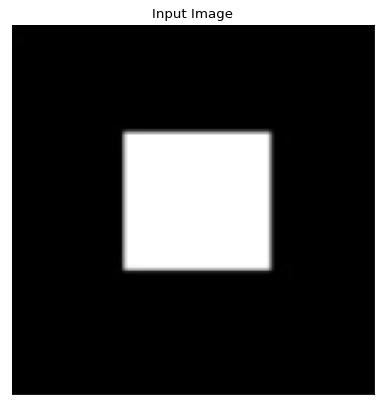

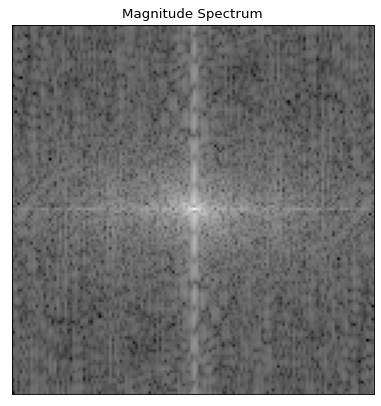

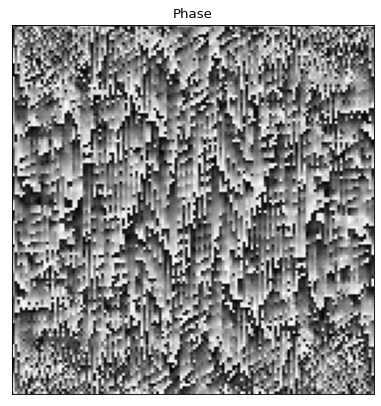

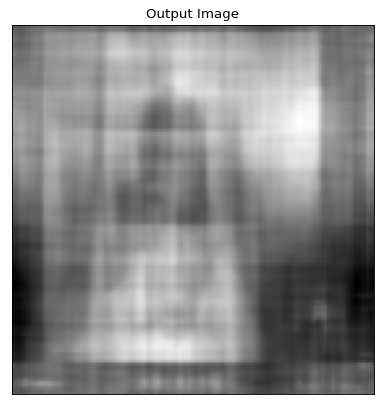

In [4]:
plt.figure(figsize=(8, 6), dpi=80)
plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])

plt.figure(figsize=(8, 6), dpi=80)
plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])

plt.figure(figsize=(8, 6), dpi=80)
plt.imshow(ang2, cmap = 'gray')
plt.title('Phase'), plt.xticks([]), plt.yticks([])

plt.figure(figsize=(8, 6), dpi=80)
plt.imshow(mixInverse, cmap = 'gray')
plt.title('Output Image'), plt.xticks([]), plt.yticks([])

plt.savefig('my_plot.png')

In [120]:
img = cv.imread('../assets/1.png',0)
imageToBeMixed = cv.imread('../assets/omda.png',0)

variable = img.shape
variable = (variable[1],variable[0])

print(imageToBeMixed.shape)
imageToBeMixed = cv.resize(imageToBeMixed, variable)
print(imageToBeMixed.shape)


(877, 2025)
(141, 138)
